<a href="https://colab.research.google.com/github/MeirelesAndre/Cases_praticos_com_bibliotecas/blob/main/Case_3_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#INSTALANDO O CHART_STUDIO
%pip install chart_studio

In [6]:
#IMPORTANDO BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
#PUXANDO O ARQUIVO HOUSING
base_casa = pd.read_csv('/content/USA_Housing.csv',sep = ',')
base_casa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
#VERIFICANDO INFORMAÇÕES
base_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
#VERIFICANDO AS DESCRIÇÕES
base_casa.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
# SUBSTITUINDO OS ESPAÇOS POR '_' COM RENAME
base_casa = base_casa.rename(columns ={'Avg. Area Income':'Avg_Area_Income', 'Avg. Area House Age':'Avg_Area House_Age', 'Avg. Area Number of Rooms':'Avg_Area_Number_of_Rooms', 'Avg. Area Number of Bedrooms':'Avg_Area_Number_of_Bedrooms', 'Area Population':'Area_Population'})

In [11]:
fig = px.box(base_casa, x = 'Price')
fig.update_traces(line_color = 'blue')

In [12]:
#REMOVENDO A COLUNA ADDRESS
base_casa.drop(['Address'], axis = 1, inplace = True)
base_casa.head()

,Avg_Area_Income,Avg_Area House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


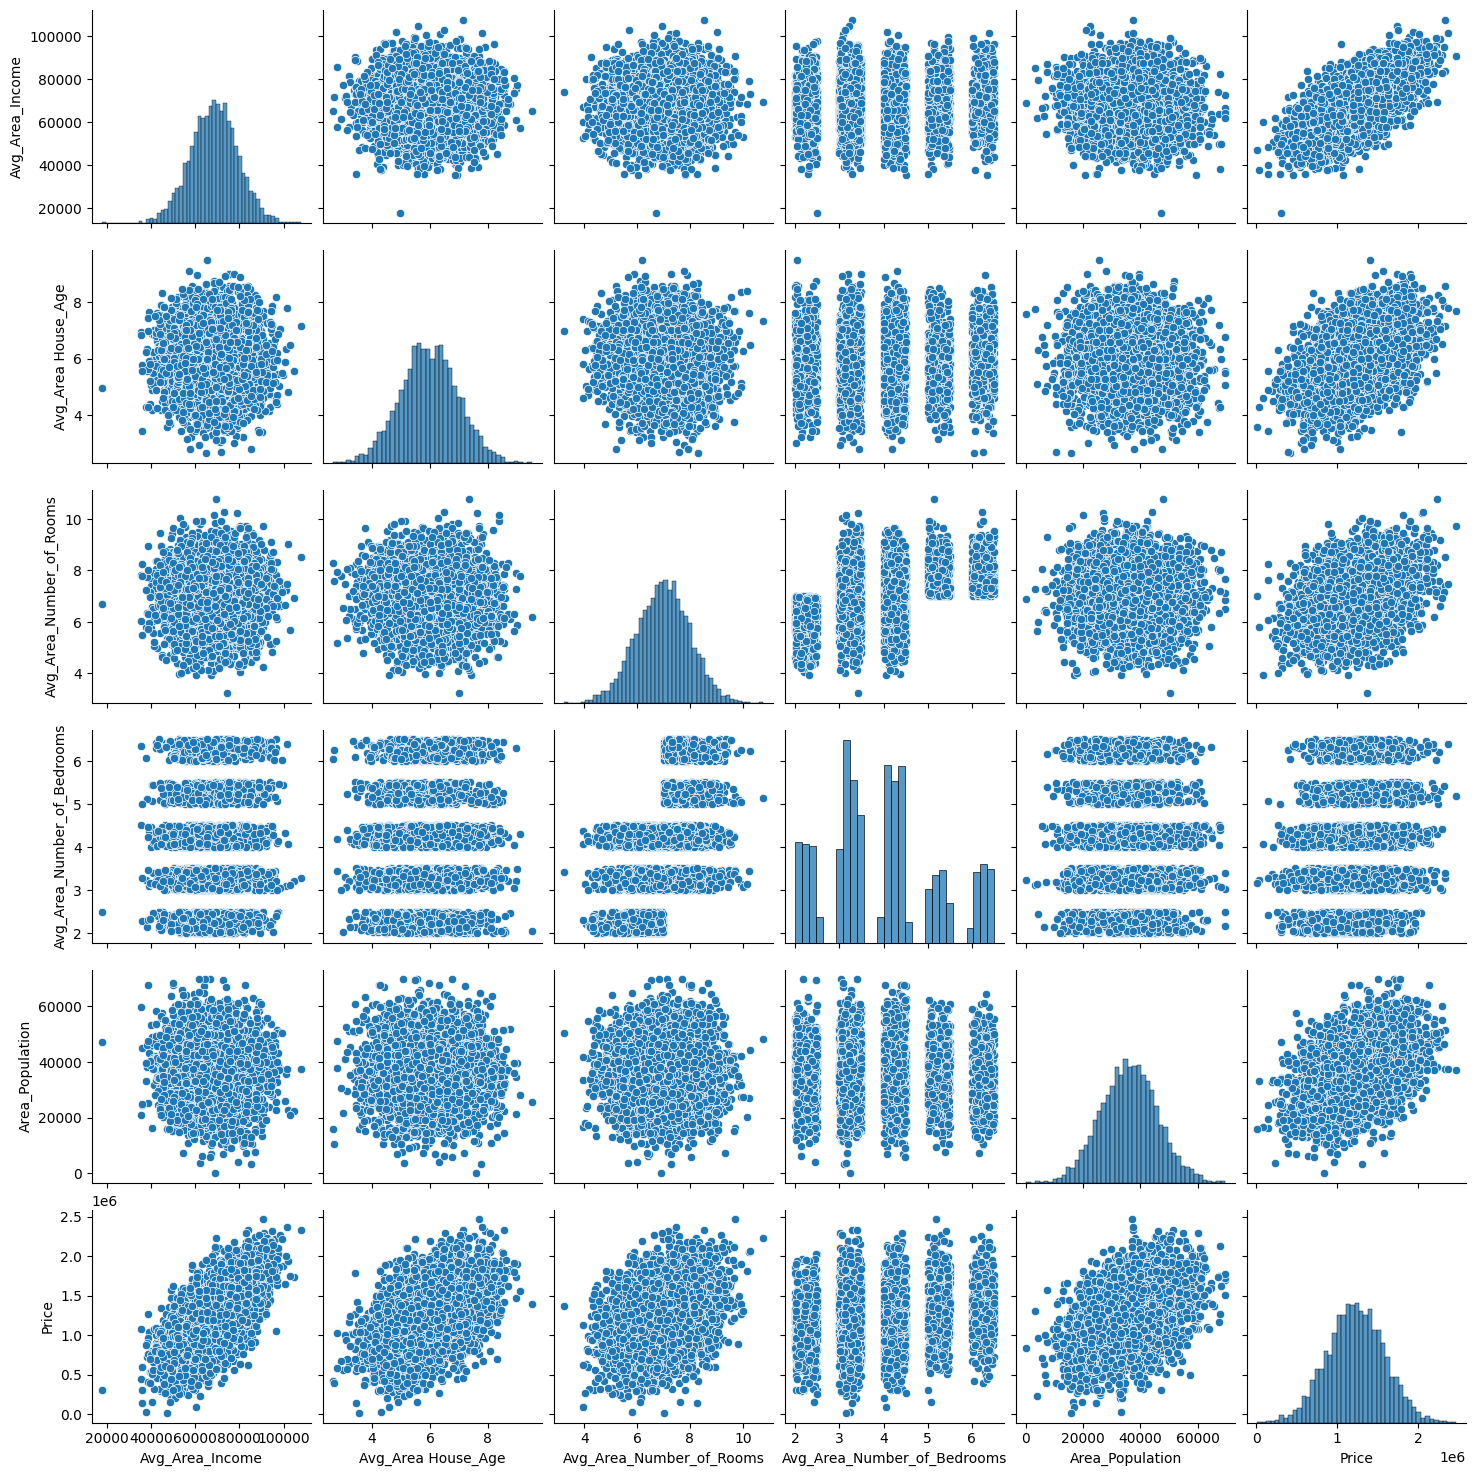

In [13]:
#UTILIZANDO PAIRPLOT PARA VISUALIZAR PUXAR TODOS OS COMPARATIVOS
sns.pairplot(base_casa)

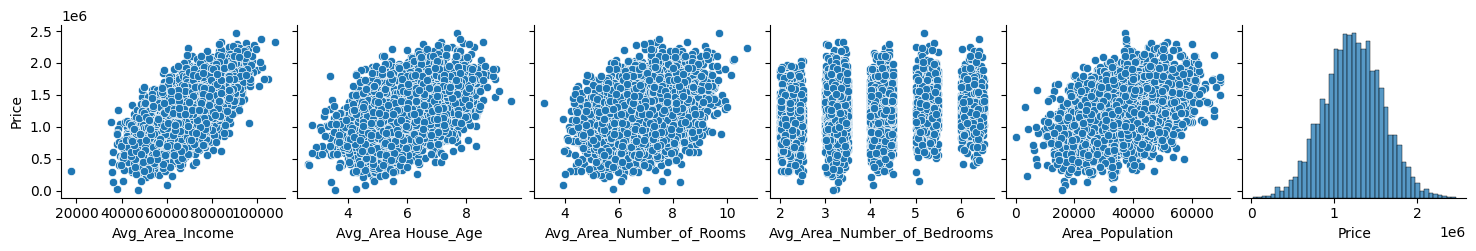

In [14]:
#UTILIZANDO O PAIRPLOT PARA PEGAR TODOS COM DADOS COM BASE NO PREÇO
sns.pairplot(base_casa, x_vars =['Avg_Area_Income', 'Avg_Area House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'], y_vars ='Price')

In [15]:
#VERIFICANDO CORRELAÇÕES
base_casa.corr()

,Avg_Area_Income,Avg_Area House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
Avg_Area_Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg_Area House_Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg_Area_Number_of_Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg_Area_Number_of_Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area_Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


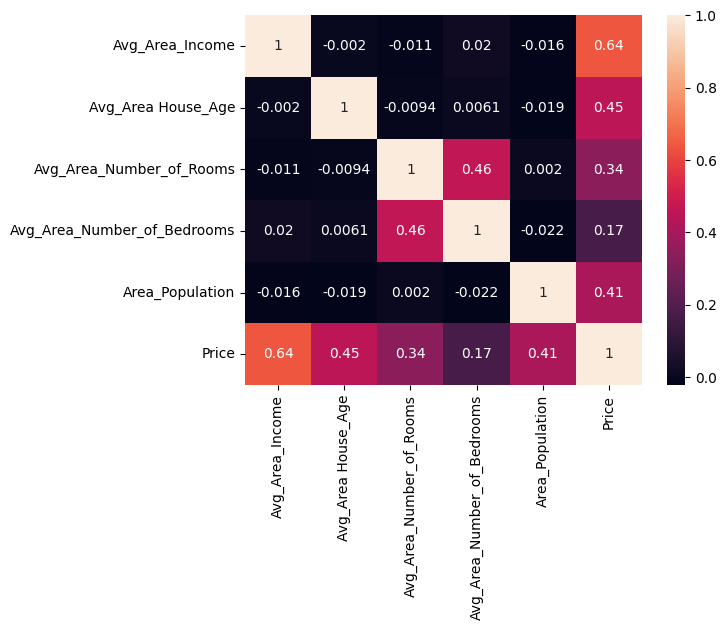

In [16]:
#VERIFICANDO CORRELAÇÕES COM HEATMAP
sns.heatmap(base_casa.corr(), annot = True);

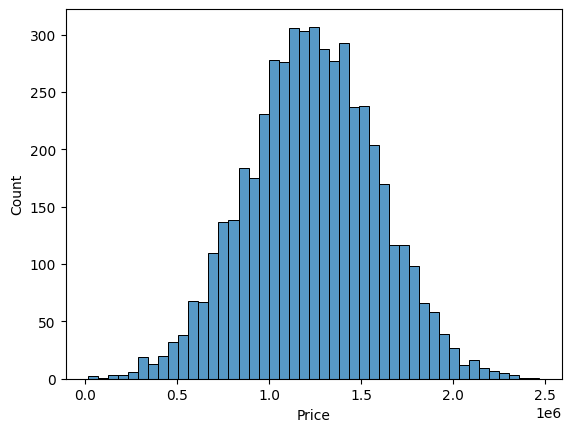

In [17]:
#UTILIZANDO HISTPLOT PARA VERIFICA A CONTAGEM DE PREÇOS
sns.histplot(base_casa['Price']);

In [18]:
#DEFININDO X COM TODAS AS COLUNAS, E Y APENAS COM O PREÇO
X = base_casa[['Avg_Area_Income', 'Avg_Area House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population']]
Y = base_casa[['Price']]

In [19]:
#MONTANDO UMA BASE DE TREINO E TESTE PARA X E Y COM SKLEARN
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size= 0.3, random_state = 42)

print(f"X_train = {X_train.shape}")
print(f"X_test = {X_test.shape}")
print(f"Y_train = {Y_train.shape}")
print(f"Y_test = {Y_test.shape}")

X_train = (3500, 5)
X_test = (1500, 5)
Y_train = (3500, 1)
Y_test = (1500, 1)


In [20]:
#IMPORTANDO MODELO DE REGREÇÃO LINEAR DO SKLEARN E 'TREINANNDO' OS MODELOS CRIADOS
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [21]:
#PREVENDO COM REGREÇÃO LINEAR
y_pred = lm.predict(X_test)

#IMPORTANDO O R2_SCORE PARA AUXÍLIAR NA ANALISE (QUANTO MAIOR O RESULTADO, MAIOR A CHANCE DE SUCESSO)
from sklearn.metrics import r2_score
r = r2_score(Y_test, y_pred)

print("r_quadrado :",r)  # RESULTANDO EM PORCENTAGEM 91.47%

r_quadrado : 0.914681849875402


Text(0, 0.5, 'Preço do Imóvel')

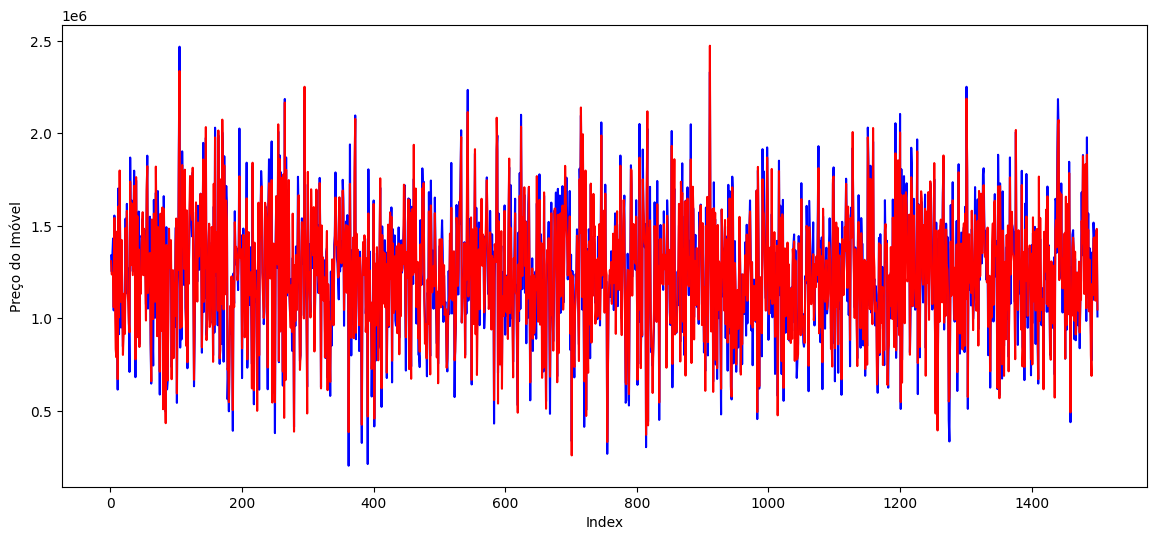

In [22]:
#RESULTADO COMO GRAFICO LINEAR
c = [i for i in range(1,1501,1)]
fig = plt.figure(figsize = (14,6))
plt.plot(c, Y_test, color = 'blue')
plt.plot(c, y_pred, color = 'red')
plt.xlabel('Index')
plt.ylabel('Preço do Imóvel')

In [24]:
#PREMISSA DO PROFESSOR

Avg_Area_Income = 50
Avg_Area_House_Age = 30
Avg_Area_Number_of_Rooms = 7
Avg_Area_Number_of_Bedrooms = 5
Area_Pupulation = 200
entrada = [[Avg_Area_Income,Avg_Area_House_Age, Avg_Area_Number_of_Rooms, Avg_Area_Number_of_Bedrooms, Area_Pupulation]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3183762.92246664])